# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the dataset

In [4]:
train = pd.read_csv(r"C:\Users\welcome\Downloads\Dataset (1)\Dataset\train.csv")
test = pd.read_csv(r"C:\Users\welcome\Downloads\Dataset (1)\Dataset\test.csv")

# Exploratory data analysis

In [5]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [8]:
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

# Checking for null values

In [9]:
train.isnull().sum()


id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

Reading and merging.csv files



In [10]:
fulfilment_center = pd.read_csv(r"C:\Users\welcome\Downloads\Dataset (1)\Dataset\fulfilment_center_info.csv")
meal_info = pd.read_csv(r"C:\Users\welcome\Downloads\Dataset (1)\Dataset\meal_info.csv")

In [11]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal,fulfilment_center, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [12]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


Dropping columns

In [13]:
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [14]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7] 
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [15]:
trainfinal = trainfinal[cols]
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

Label encoding

In [17]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,TYPE_C,2.0,Beverages,Thai,136.83,152.29,0,0,177
1,1018704,2,647,56,TYPE_C,2.0,Beverages,Thai,135.83,152.29,0,0,323
2,1196273,3,647,56,TYPE_C,2.0,Beverages,Thai,132.92,133.92,0,0,96
3,1116527,4,647,56,TYPE_C,2.0,Beverages,Thai,135.86,134.86,0,0,163
4,1343872,5,647,56,TYPE_C,2.0,Beverages,Thai,146.50,147.50,0,0,215


In [18]:
trainfinal.shape

(456548, 13)

Data visualization

C:\Users\welcome\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'num_orders Distribution')

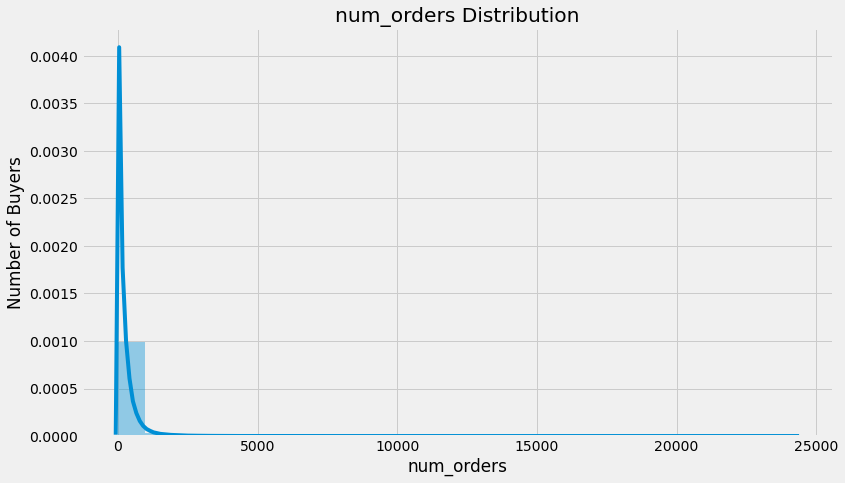

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins = 25)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")


In [20]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'city_code', 'region_code', 'week', 'base_price'],
      dtype='object')

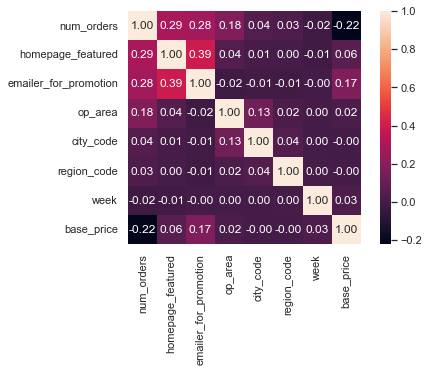

In [21]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0) 
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

Spliting the dataset into dependent and independent variable

In [22]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
Y = trainfinal['num_orders'].values
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,city_code,region_code,week,base_price
0,0,0,2.0,647,56,1,152.29
1,0,0,2.0,647,56,2,152.29
2,0,0,2.0,647,56,3,133.92
3,0,0,2.0,647,56,4,134.86
4,0,0,2.0,647,56,5,147.50


Split the dataset into train set and test set

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25)

Train and test model algorithms

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

Model Evalution

In [25]:
XG = XGBRegressor()
XG.fit(X_train, Y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 90.17340450816644


In [26]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 155.5925314158371


In [27]:
L = Lasso()
L.fit(X_train, Y_train)
y_pred = L.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 154.22764403430173


In [28]:
EN = ElasticNet()
EN.fit(X_train, Y_train)
y_pred = EN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 128.78222265747857


In [29]:
DT = DecisionTreeRegressor()
DT.fit(X_train, Y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 89.62353861675314


In [31]:
KNN = DecisionTreeRegressor()
KNN.fit(X_train, Y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 89.69624078423566


In [32]:
GB = DecisionTreeRegressor()
GB.fit(X_train, Y_train)
y_pred = GB.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(Y_val, y_pred)))

RMSLE: 89.69486390813549


Save the model

In [33]:
import pickle
pickle.dump(DT,open('fdemand.pkl','wb'))

Predicting the output using the model

In [38]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, fulfilment_center, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)


tcols = testfinal.columns.tolist()
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]


Ib1 = LabelEncoder()
testfinal['center_type'] = Ib1.fit_transform(testfinal['center_type'])

Ib2 = LabelEncoder()
testfinal['category'] = Ib1.fit_transform(testfinal['category'])

Ib3 = LabelEncoder()
testfinal['cuisine'] = Ib1.fit_transform(testfinal['cuisine'])

X_test = testfinal[features].values


pred = DT.predict(X_test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'id' : testfinal['id'],
    'num_orders' : pred
})


In [39]:
submit.to_csv("submission.csv", index=False)
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,248.924403
std,1.441580e+05,357.197327
min,1.000085e+06,13.000000
25%,1.123969e+06,54.500000
50%,1.247296e+06,136.000000
75%,1.372971e+06,311.000000
max,1.499996e+06,9019.000000
